In [ ]:
!pip install pygad
import pygad
from google.colab import drive
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 2.1 MB/s 


In [ ]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import (SMOTE, BorderlineSMOTE, SVMSMOTE, SMOTENC)
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from imblearn.base import BaseSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import  RandomUnderSampler
from sklearn.metrics import classification_report,f1_score, confusion_matrix,recall_score, accuracy_score,precision_score, precision_recall_fscore_support,roc_auc_score, roc_curve, auc
from imblearn.metrics import geometric_mean_score,sensitivity_score,specificity_score

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold,ShuffleSplit
import numpy as np
import random
import pandas as pd
def CreateDataByRatio(data,size):
  # data_new =pd.DataFrame(columns=['label','feature'])
  data_new=[]
  # print(data[['label','feature']])
  data_random=np.array( data[['label','feature','feature_v','pre_routes']])
  random.shuffle(data_random)
  while len(data_new)< size:
    data_new.append(random.choice(data_random))
  return pd.DataFrame(data_new,columns=['label','feature','feature_v','pre_routes'])

In [ ]:
def ReadDataToCsvFile(path_csv_file):
  data=pd.read_csv(path_csv_file,encoding='utf-8', converters={'p_start':eval,'p_temp':eval,'p_end':eval}, index_col=0)
  data['label'] = data['label'].apply(lambda label: 0 if label == False else 1)
  return data


In [ ]:
def GetDataByLabel(data,label):
  dataByLabel =data[data.label==label]
  return dataByLabel

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)

In [ ]:
data

In [ ]:
data=ReadDataToCsvFile('/content/drive/MyDrive/DATA-LUAN_VAN/new_clean_bo3.csv')
# data=ReadDataToCsvFile('/content/drive/MyDrive/DATA-LUAN_VAN/clean_bo3_tdrive.csv')
data['feature'] = data['p_start'] + data['p_temp'] + data['p_end']
data['feature_v']= None
data['router'] =None
feature_v=[]
routers =[]
for index, row in data.iterrows():
  feature_v.append([row['p_start'][1],row['p_start'][0],row['p_temp'][1],row['p_temp'][0],row['p_end'][1],row['p_end'][0]])
  routers.append(row['pre_routes'])

data['feature_v']=feature_v
data['router']=routers
data.head(5)
# data

,index,vehicle_id,p_start,p_temp,p_end,pre_routes,freq,label,regions,feature,feature_v,router
0,0,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.738, 10.8012)","('xa_lộ_hà_nội', 'xa_lộ_hà_nội', 'thảo_điền')",121,0,"('phường_thảo_điền_quận_2', 'phường_thảo_điền_...","(106.74, 10.8014, 106.73899999999999, 10.8012,...","[10.8014, 106.74, 10.8012, 106.73899999999999,...","('xa_lộ_hà_nội', 'xa_lộ_hà_nội', 'thảo_điền')"
1,16,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.73100000000001, 10.7996)","('xa_lộ_hà_nội', 'xa_lộ_hà_nội', 'cầu_sài_gòn_1')",305,0,"('phường_thảo_điền_quận_2', 'phường_thảo_điền_...","(106.74, 10.8014, 106.73899999999999, 10.8012,...","[10.8014, 106.74, 10.8012, 106.73899999999999,...","('xa_lộ_hà_nội', 'xa_lộ_hà_nội', 'cầu_sài_gòn_1')"
2,21,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.721, 10.7981)","('xa_lộ_hà_nội', 'xa_lộ_hà_nội', 'điện_biên_phủ')",522,0,"('phường_thảo_điền_quận_2', 'phường_thảo_điền_...","(106.74, 10.8014, 106.73899999999999, 10.8012,...","[10.8014, 106.74, 10.8012, 106.73899999999999,...","('xa_lộ_hà_nội', 'xa_lộ_hà_nội', 'điện_biên_phủ')"
3,40,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.695, 10.7912)","('xa_lộ_hà_nội', 'xa_lộ_hà_nội', 'võ_thị_sáu')",250,0,"('phường_thảo_điền_quận_2', 'phường_thảo_điền_...","(106.74, 10.8014, 106.73899999999999, 10.8012,...","[10.8014, 106.74, 10.8012, 106.73899999999999,...","('xa_lộ_hà_nội', 'xa_lộ_hà_nội', 'võ_thị_sáu')"
4,50,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.68799999999999, 10.7858)","('xa_lộ_hà_nội', 'xa_lộ_hà_nội', 'nam_kỳ_khởi_...",127,0,"('phường_thảo_điền_quận_2', 'phường_thảo_điền_...","(106.74, 10.8014, 106.73899999999999, 10.8012,...","[10.8014, 106.74, 10.8012, 106.73899999999999,...","('xa_lộ_hà_nội', 'xa_lộ_hà_nội', 'nam_kỳ_khởi_..."


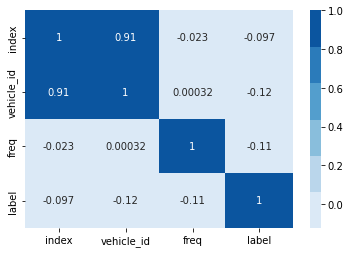

In [ ]:
import seaborn as sns
colormap = sns.color_palette("Blues")
sns.heatmap(data.corr(), annot=True, cmap=colormap);

In [ ]:
# ratio test 2:8
# 2 minority
# 8 majority
# data train ratio 0.25% total data
# with total
def GetDataByRatio(total_major,total_minor,ratio_minority,ratio_majority):
  n=round(total_major/total_minor,1)
  print("n" ,n)
  n1=round(ratio_majority/ratio_minority,1)
  print("n1" ,n1)
  if n==n1:
    print("case1")
    return round(total_minor,0),round(total_major,0)
  elif n>n1:
    # giam da so dat ti le
    print("case2")
    return int(total_minor),int((total_minor)*n1)
  else:
    print("case3")
    return int((total_major)/n1) ,int(total_major)


In [ ]:
# da so
total_major=len(data[data.label==0])
# thieu so
total_minor=len(data[data.label==1])
total_minority_train,total_majority_train=GetDataByRatio(total_major,total_minor,1,100)
# print("total_minority_train",total_minority_train)
# print("total_minor",total_minor)
# print("total_major",total_major)
# print("total_majority_train",total_majority_train)
# print("total_minority_train",total_minority_train)
# print("ti le",total_majority_train/total_minority_train)

n 1.7
n1 100.0
case3


In [ ]:
# nhom thieu so
data_minority =data[data.label==1]
# nhom da so
data_majority =data[data.label==0]
data_minor=CreateDataByRatio(data_minority,total_minority_train)
data_major=CreateDataByRatio(data_majority,total_majority_train)
print("data_major",len(data_major))
print("data_minor",len(data_minor))
# print(data_major)
# data_new=data_minor.join(data_major)
data_new=data_minor.append(data_major)
print("data_new",len(data_new))
print(len(data_new[data_new.label==1]))
# data_major.head(10)


data_major 9401
data_minor 94
data_new 9495
94


In [ ]:
data_new

,label,feature,feature_v,pre_routes
0,1,"(106.65100000000001, 10.7532, 106.652, 10.753,...","[10.7532, 106.65100000000001, 10.753, 106.652,...","('nguyễn_trãi', 'nguyễn_trãi', 'phạm_hùng')"
1,1,"(106.661, 10.748, 106.661, 10.7482, 106.663, 1...","[10.748, 106.661, 10.7482, 106.661, 10.7551, 1...","('cầu_chà_và', 'cầu_chà_và', 'mạc_thiên_tích')"
2,1,"(106.669, 10.753, 106.662, 10.7639, 106.647, 1...","[10.753, 106.669, 10.7639, 106.662, 10.7732, 1...","('trần_phú', 'hẻm_166_nguyễn_kim', 'lạc_long_q..."
3,1,"(106.705, 10.821, 106.696, 10.7977, 106.71, 10...","[10.821, 106.705, 10.7977, 106.696, 10.8248, 1...","('nơ_trang_long', 'hẻm_128_lê_văn_duyệt', 'hẻm..."
4,1,"(106.654, 10.7396, 106.656, 10.7393, 106.667, ...","[10.7396, 106.654, 10.7393, 106.656, 10.772, 1...","('phạm_thế_hiển', 'quốc_lộ_50', 'hẻm_436a_3_th..."
...,...,...,...,...
9396,0,"(106.664, 10.7694, 106.667, 10.7676, 106.678, ...","[10.7694, 106.664, 10.7676, 106.667, 10.7347, ...","('hẻm_7/3_thành_thái', 'nguyễn_tri_phương', 'p..."
9397,0,"(106.654, 10.7396, 106.669, 10.7605, 106.66799...","[10.7396, 106.654, 10.7605, 106.669, 10.7723, ...","('phạm_thế_hiển', 'nguyễn_tri_phương', 'hẻm_40..."
9398,0,"(106.579, 10.7359, 106.595, 10.7866, 106.595, ...","[10.7359, 106.579, 10.7866, 106.595, 10.7885, ...","('cầu_kênh_5', 'cầu_bình_thuận', 'quốc_lộ_1')"
9399,0,"(106.68299999999999, 10.7787, 106.68, 10.7764,...","[10.7787, 106.68299999999999, 10.7764, 106.68,...","('võ_thị_sáu', 'số_8', 'nguyễn_thị_thập')"


In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
from collections import Counter
from sklearn import decomposition
# vectorizer = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)
# clf = SVC(C=5.0, kernel='rbf', tol=1e-5, max_iter=-1, random_state=42,probability=False)
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# X=np.array(data_new['feature_v'].tolist())
# y=data_new['label']


X=np.array(data_new['feature_v'].tolist())
y=data_new['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# X_train_m = vectorizer.fit_transform(X_train)
# X_train_m=vectorizer.transform(X_train_m)
# X_test_m=vectorizer.fit_transform(X_test)
# X_test_m = vectorizer.transform(X_test)


X_train_PCA=X_train
X_test_PCA=X_test
pca = decomposition.PCA(n_components=3)
pca.fit(X_train_PCA)
X_train_PCA = pca.transform(X_train_PCA)

pca.fit(X_test_PCA)
X_test_PCA = pca.transform(X_test_PCA)
# print(X_train_PCA.shape)


# print(X_test.shape)
# print(X_train.shape)
# print(X_test_PCA.shape)
# print(X_train_PCA.shape)
# # X_train_m = vectorizer.fit_transform(X_train)
# # X_test_m = vectorizer.transform(X_test)
X_train_m=X_train_PCA
X_test_m=X_test_PCA



In [ ]:

function_inputs = y_test
desired_output =0.2
ratio_over=0.1
ratio_under=0.9
def function_threshold_resample(solution, solution_idx):
  precent_over =random.uniform(0.5, 1)
  f_resample=SVMSMOTE(sampling_strategy = precent_over, random_state=0) #0.7277890322254528
  f_resample=SMOTE(sampling_strategy = precent_over, random_state=0) #0.7277890322254528
  f_resample=BorderlineSMOTE(sampling_strategy = precent_over, random_state=0) #0.7277890322254528
  # ADASYN,SMOTETomek
  X_over, y_over = f_resample.fit_resample(X_train_m, y_train)
  par= {'C': 1000, 'gamma': 1, 'kernel': 'rbf', 'tol': 0.6,'random_state':42,'max_iter':-1,'probability':True}
  clf=SVC()
  clf.set_params(**par)
  clf.fit(X_over,y_over)
  y_train_pred = clf.predict(X_over)
  y_pred=clf.predict(X_test_m)
  g_mean= geometric_mean_score(y_pred,y_test)
  print('g_mean:',g_mean)
  print('precent_over: ',precent_over)
  fitness =g_mean
  return fitness

def fitness_func_svm(solution, solution_idx):
  ratio_over=random.uniform(0.1, 0.4)
  print('ratio_over',ratio_over)
  ratio_under=random.uniform(0.5, 0.8)
  print('ratio_under',ratio_under)
  over = SMOTE(sampling_strategy=ratio_over)
  under = RandomUnderSampler(sampling_strategy=ratio_under)
  steps = [('o', over), ('u', under)]
  pipeline = Pipeline(steps=steps)
  X_over, y_over = pipeline.fit_resample(X_train_m, y_train)
  print(Counter(y_over))
  par= {'C': 1000, 'gamma': 1, 'kernel': 'rbf', 'tol': 0.6,'random_state':42,'max_iter':-1,'probability':True}
  clf=SVC()
  clf.set_params(**par)
  # clf = SVC(C=5, kernel='rbf', tol=1e-5, max_iter=-1, random_state=42,probability=True)
  clf.fit(X_over,y_over)
  y_train_pred = clf.predict(X_over)
  y_pred=clf.predict(X_test_m)
  # y_proba=clf.predict_proba(X_test_m)
  g_mean= geometric_mean_score(y_pred,y_test)
  print('g_mean:',g_mean)
  fitness =g_mean
  #  1.0 / numpy.abs(g_mean - desired_output)
  # except:
  #   fitness=0
  return fitness

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.5311848866654733
g_mean: 0.16432821674748757
precent_over:  0.7517237562048237


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.4718522840648349
g_mean: 0.1723620243722571
precent_over:  0.7789067086540247


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.3081793468906987


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.5532135864945512


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.6419788345912538


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.24458785715519651


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.6438055137332651
g_mean: 0.16567234988492438
precent_over:  0.9837750445593391


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.5772444782445684
g_mean: 0.30636895920736906
precent_over:  0.7277890322254528
g_mean: 0.16618197014204195
precent_over:  0.9112600894386619


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.6918016499449281
g_mean: 0.15766309461712044
precent_over:  0.7977185990353151


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.3870441283093158


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.2704195484949729


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.34857095616517775
g_mean: 0.1720366363487503
precent_over:  0.8707977545907252
g_mean: 0.16977783369107788
precent_over:  0.8217696285696175
g_mean: 0.0
precent_over:  0.7042506997857977


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.6789694016039539


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.4945609140875905


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.687484594382949


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.6183795158365857


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.5099988639128197
g_mean: 0.1600687547928141
precent_over:  0.771306884570776
g_mean: 0.16553904937969824
precent_over:  0.9451272160859122


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.42953375157156826


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.6608959394702049


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.3572438517723985


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.4336454301600102
g_mean: 0.1275910959747707
precent_over:  0.7509636389224825


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.6155848528042196
g_mean: 0.16180189533617406
precent_over:  0.79621880193726
g_mean: 0.16696338134668828
precent_over:  0.941204366624238


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.7040452970568202


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.6217590158857756


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.645683051498958


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.24693590453515027
g_mean: 0.1697870823008353
precent_over:  0.9227381527264115


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.619756522396592


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.5297857013136771
g_mean: 0.1396630878883428
precent_over:  0.749098744588453
g_mean: 0.0
precent_over:  0.7097453945519305
g_mean: 0.17090082701126647
precent_over:  0.91007762669938


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.1890325683279015


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.16777766988838583


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.6308797155643002


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.4254565481732372
g_mean: 0.1719374382051609
precent_over:  0.8464680753791413
g_mean: 0.1583255759429077
precent_over:  0.7597455495230152


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.33959998524766366


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.3014085520301336
g_mean: 0.16582210253105956
precent_over:  0.7570914551854252


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.6295256112513579
g_mean: 0.166449522856338
precent_over:  0.9183287968175776


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.3593547379842231


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.5629335924337969


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.2135059658932321


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.1844945238297095
g_mean: 0.1727906976004469
precent_over:  0.7446413653501327


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.5472694826986703
g_mean: 0.16367754668964002
precent_over:  0.9525791937080934


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.2817975428432357


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.6358547713891083


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.6116144821226849
g_mean: 0.17076041709444376
precent_over:  0.9010130074096038
g_mean: 0.1600687547928141
precent_over:  0.7711032737199713
g_mean: 0.14859855138026712
precent_over:  0.7805231427023601


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.5394747687251421
g_mean: 0.1724441052202228
precent_over:  0.7769771953959803


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.40844171081208214
g_mean: 0.1632876342360937
precent_over:  0.7622534758315732


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.49947693321225484
g_mean: 0.0
precent_over:  0.7231370900981468


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.2296893762730759
g_mean: 0.17151039105483082
precent_over:  0.8347119249026338
g_mean: 0.0
precent_over:  0.7255034148222664
g_mean: 0.29932412011169957
precent_over:  0.718815037746374


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.6952209427724365


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.22927014261778195


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.6601669177113868


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.20153084775868213


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.22329083386608245


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.39863006130060663
g_mean: 0.1560252160345509
precent_over:  0.7991620617910801


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.2881077272999183


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.6515441210601252


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.3603840206084421


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.7083560846898828


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.5625222200844447


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.24957126428850354
g_mean: 0.0
precent_over:  0.6973724508506743


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.5730674608321745
g_mean: 0.17452692215823187
precent_over:  0.8726802558567072


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.30266053807353754


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.675395091123163


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.4702908969277698
g_mean: 0.17259166036573662
precent_over:  0.7503104880304546


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.29285129802504095


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.17052262145575403
g_mean: 0.1704806257792988
precent_over:  0.9030170055962421


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.5478709448948464


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.6481269781110385


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.7099942672931605


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.5501258045298285


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.45446100094183917


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.29809195650344994


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.6744691928672385


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.3522479377295673


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.11549306671082175
g_mean: 0.16790786817464315
precent_over:  0.8053442658972606


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.34658479437589607


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.6699724409603051
g_mean: 0.1623540188289347
precent_over:  0.7865504611760579


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.29628794480067244


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.4688526414726971


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.4766136221686089


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.10705860292379138


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.4622042331519496
g_mean: 0.1625956622159123
precent_over:  0.9245462953796707


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.3549847678729554
g_mean: 0.16672544346497162
precent_over:  0.8630286535512557


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.4191651556508873
g_mean: 0.17347360678080243
precent_over:  0.8761536575183614


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.4037775405874787


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.43924529591127826


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.43796973952442797


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.12879771254129388
g_mean: 0.1575265833975671
precent_over:  0.7640248038748563
g_mean: 0.0
precent_over:  0.7229421938897522


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.5991635792878548


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.1227736832932447
g_mean: 0.286579237863576
precent_over:  0.7275589433988816


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.42364926763169686
g_mean: 0.14564504678199278
precent_over:  0.8089840349374254
g_mean: 0.1671233617591053
precent_over:  0.7658654875551522


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.5615746623801271


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.39701324982271813


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.49619674873060615
g_mean: 0.16573711861100304
precent_over:  0.8768723893594704
g_mean: 0.15018330329572865
precent_over:  0.774150483200839


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.20358324827695784
g_mean: 0.16414787883634419
precent_over:  0.9852785916852921
g_mean: 0.17270042812538544
precent_over:  0.844456424877053
g_mean: 0.16837064516808287
precent_over:  0.9668286775007536
g_mean: 0.15826379434579502
precent_over:  0.810820527351739


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.26879977867793425
g_mean: 0.18437482124073562
precent_over:  0.7433322273882524


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.549444739456266


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.4743659984976999


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


g_mean: 0.0
precent_over:  0.5986694716265076
g_mean: 0.15296345971502315
precent_over:  0.7614488466397339
g_mean: 0.0
precent_over:  0.3508639206588998
solution 1899
Parameters of the best solution : [ 3.11223299 -2.03373697 -3.94640693 ...  3.86930985  1.18274493
  1.18755181]
Fitness value of the best solution = 0.30636895920736906


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


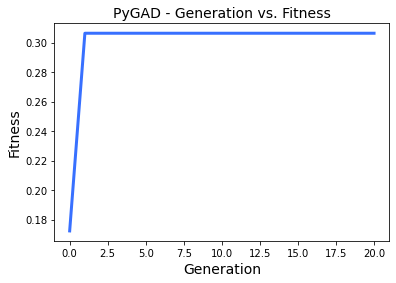

CPU times: user 54min 42s, sys: 18.5 s, total: 55min
Wall time: 55min 26s


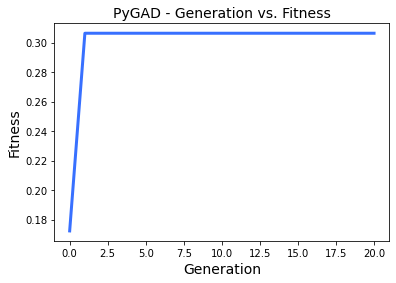

In [ ]:
%%time
fitness_function = function_threshold_resample
num_generations = 20
num_parents_mating = 4
sol_per_pop = 8
num_genes = len(function_inputs)
init_range_low = -4
init_range_high =4
parent_selection_type = "sss"
keep_parents = 1
crossover_type = "single_point"
mutation_type = "random"
random_mutation_min_val=0
random_mutation_max_val=1.0
mutation_percent_genes = 30
# print(len(function_inputs))
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)
ga_instance.run()
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print('solution',len(solution))
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
ga_instance.plot_fitness()

In [ ]:
%%time




# !pip install xlsxwriter
# import xlsxwriter

smotes = {0 : 'SMOTE',
          1 : 'BorderlineSMOTE',
          2 : 'SVMSMOTE',
          3 : 'ADASYN',
          4 : 'SMOTETomek',
          5 : 'RandomOverSampler',
          6 : 'SMOTE_RandomUnderSampler',
          7 : 'ADASYN_RandomUnderSampler',
          8 : 'SVMSMOTE_RandomUnderSampler',
          9 : 'BorderlineSMOTE_RandomUnderSampler'}


Classifiers ={
    0 : 'SVM',
    1 : 'RandomForest',
    2 : 'LogisticRegression'
}
G_means =[]
F_scores =[]
Weighted_accuracys =[]
Row_head = []
for j , Classifier in enumerate((
    SVC(C=5, kernel='rbf', tol=1e-5, max_iter=-1, random_state=42,probability=True,class_weight="balanced"),
    RandomForestClassifier(n_estimators=500,
                                max_depth=10,
                                min_samples_split=400,
                                random_state=12,
                                class_weight="balanced",
                                max_features="auto"),
    LogisticRegression(random_state=0,C = 0.0001)
)):

  print('=========================================',Classifiers[j])
  rf_clf= Classifier
  rf_clf.fit(X_train_m,y_train)
  rf_pred_label = rf_clf.predict(X_test_m)
  rf_predictions = rf_clf.predict_proba(X_test_m)
  rf_roc_score = round(roc_auc_score(y_test, rf_predictions[:,1]),4)
  rf_f1_score = round(f1_score(y_test, rf_pred_label),4)
  rf_g_mean = round(geometric_mean_score(rf_pred_label,y_test),4)
  print('---------NOMAL---------------------------------------')
  # print('SMOTE method: ', smotes[i])
  print('roc score on test: ', rf_roc_score)
  print('f1 score on test: ', rf_f1_score)
  print('G-mean score',rf_g_mean)
  wei_acc=round(0.5*sensitivity_score(y_test, rf_pred_label, average='macro')+0.5* specificity_score(y_test, rf_pred_label, average='macro'),4)
  print('Weighted accuracy',wei_acc)
  Row_head.append(Classifiers[j])
  G_means.append(rf_g_mean)
  F_scores.append(rf_f1_score)
  Weighted_accuracys.append(wei_acc)
  for i, sampler in enumerate((SMOTE(sampling_strategy = 0.7277890322254528, random_state=0),
                  BorderlineSMOTE(sampling_strategy = 0.7277890322254528, random_state=0, kind='borderline-1'),
                  SVMSMOTE(sampling_strategy = 0.7277890322254528, random_state=0),
                  ADASYN(sampling_strategy = 0.7277890322254528, random_state=0),
                  SMOTETomek ( random_state=0,sampling_strategy = 0.7277890322254528),
                  RandomOverSampler(sampling_strategy  = 0.7277890322254528, random_state=0),
                  make_pipeline(SMOTE(sampling_strategy=0.1), RandomUnderSampler(sampling_strategy=0.9)),
                  make_pipeline(ADASYN(sampling_strategy=0.1), RandomUnderSampler(sampling_strategy=0.9)),
                  make_pipeline(SVMSMOTE(sampling_strategy=0.1), RandomUnderSampler(sampling_strategy=0.9))
                  )):

    X_resampling,y_resampling =sampler.fit_resample(X_train_m,y_train)
    rf_clf.fit(X_resampling,y_resampling)
    # pipe_line = make_pipeline(sampler, rf_clf)
    # pipe_line.fit(X_train_m, y_train)

    rf_predictions = rf_clf.predict_proba(X_test_m)
    rf_pred_label = rf_clf.predict(X_test_m)

    # rf_predictions = pipe_line.predict_proba(X_test_m)
    # rf_pred_label = pipe_line.predict(X_test_m)
    rf_roc_score =round( roc_auc_score(y_test, rf_predictions[:,1]),4)
    rf_f1_score =round( f1_score(y_test, rf_pred_label),4)
    rf_g_mean =round( geometric_mean_score(rf_pred_label,y_test),4)
    print('------------------------------------------------')
    print(Counter(y_resampling))
    print('method: ', smotes[i])
    print('roc score on test: ', rf_roc_score)
    print('f1 score on test: ', rf_f1_score)
    print('G-mean score',rf_g_mean)
    wei_acc=round(0.5*sensitivity_score(y_test, rf_pred_label, average='macro')+0.5* specificity_score(y_test, rf_pred_label, average='macro'),4)
    print('Weighted accuracy',wei_acc)
    Row_head.append(smotes[i])
    G_means.append(rf_g_mean)
    F_scores.append(rf_f1_score)
    Weighted_accuracys.append(wei_acc)


========================================= SVM
---------NOMAL---------------------------------------
roc score on test:  0.6981
f1 score on test:  0.0508
G-mean score 0.1618
Weighted accuracy 0.6441
------------------------------------------------
Counter({0: 7063, 1: 5140})
method:  SMOTE
roc score on test:  0.7011
f1 score on test:  0.0548
G-mean score 0.1686
Weighted accuracy 0.6462
------------------------------------------------
Counter({0: 7063, 1: 5140})
method:  BorderlineSMOTE
roc score on test:  0.6322
f1 score on test:  0.0687
G-mean score 0.1915
Weighted accuracy 0.6416
------------------------------------------------
Counter({0: 7063, 1: 3093})
method:  SVMSMOTE
roc score on test:  0.6475
f1 score on test:  0.0687
G-mean score 0.1911
Weighted accuracy 0.6495
------------------------------------------------
Counter({0: 7063, 1: 5116})
method:  ADASYN
roc score on test:  0.7002
f1 score on test:  0.0533
G-mean score 0.1662
Weighted accuracy 0.6415
----------------------------

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and 

------------------------------------------------
Counter({0: 7063, 1: 3093})
method:  SVMSMOTE
roc score on test:  0.4186
f1 score on test:  0.0
G-mean score 0.0
Weighted accuracy 0.5
------------------------------------------------
Counter({0: 7063, 1: 5116})
method:  ADASYN
roc score on test:  0.5237
f1 score on test:  0.0
G-mean score 0.0
Weighted accuracy 0.5
------------------------------------------------
Counter({0: 7050, 1: 5127})
method:  SMOTETomek
roc score on test:  0.5009
f1 score on test:  0.0
G-mean score 0.0
Weighted accuracy 0.5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------------------------------------------------
Counter({0: 7063, 1: 5140})
method:  RandomOverSampler
roc score on test:  0.451
f1 score on test:  0.0
G-mean score 0.0
Weighted accuracy 0.5
------------------------------------------------
Counter({0: 784, 1: 706})
method:  SMOTE_RandomUnderSampler
roc score on test:  0.5139
f1 score on test:  0.0
G-mean score 0.0
Weighted accuracy 0.5
------------------------------------------------
Counter({0: 807, 1: 727})
method:  ADASYN_RandomUnderSampler
roc score on test:  0.5648
f1 score on test:  0.0
G-mean score 0.0
Weighted accuracy 0.5
------------------------------------------------
Counter({0: 467, 1: 421})
method:  SVMSMOTE_RandomUnderSampler
roc score on test:  0.4203
f1 score on test:  0.0
G-mean score 0.0
Weighted accuracy 0.5
CPU times: user 3min 51s, sys: 1.63 s, total: 3min 53s
Wall time: 3min 57s


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
df = pd.DataFrame(columns =["Algorithm","Weighted accuracy","G-mean","F-score"])
df['Algorithm']=Row_head
df['Weighted accuracy']=Weighted_accuracys
df['G-mean']=G_means
df['F-score']=F_scores
df

,Algorithm,Weighted accuracy,G-mean,F-score
0,SVM,0.6441,0.1618,0.0508
1,SMOTE,0.6462,0.1686,0.0548
2,BorderlineSMOTE,0.6416,0.1915,0.0687
3,SVMSMOTE,0.6495,0.1911,0.0687
4,ADASYN,0.6415,0.1662,0.0533
5,SMOTETomek,0.6462,0.1686,0.0548
6,RandomOverSampler,0.6479,0.1635,0.0518
7,SMOTE_RandomUnderSampler,0.6479,0.1663,0.0534
8,ADASYN_RandomUnderSampler,0.6721,0.1750,0.0590
9,SVMSMOTE_RandomUnderSampler,0.6065,0.1578,0.0480


In [ ]:

from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.svm import LinearSVC, SVC
from  sklearn.calibration  import CalibratedClassifierCV
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
import numpy
over = SMOTE(sampling_strategy=0.14)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X_over, y_over = pipeline.fit_resample(X_train_m, y_train)
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'tol':[1e-5,1e-10,0.1,0.2,0.5,0.6],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_over, y_over)
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

In [ ]:

function_inputs = y_test
desired_output =0.2
ratio_over=0.1
ratio_under=0.9
def fitness_func_svm(solution, solution_idx):
  ratio_over=random.uniform(0.1, 0.4)
  print('ratio_over',ratio_over)
  ratio_under=random.uniform(0.5, 0.8)
  print('ratio_under',ratio_under)
  over = SMOTE(sampling_strategy=ratio_over)
  under = RandomUnderSampler(sampling_strategy=ratio_under)
  steps = [('o', over), ('u', under)]
  pipeline = Pipeline(steps=steps)
  X_over, y_over = pipeline.fit_resample(X_train_m, y_train)
  print(Counter(y_over))
  par= {'C': 1000, 'gamma': 1, 'kernel': 'rbf', 'tol': 0.6,'random_state':42,'max_iter':-1,'probability':True}
  clf=SVC()
  clf.set_params(**par)
  # clf = SVC(C=5, kernel='rbf', tol=1e-5, max_iter=-1, random_state=42,probability=True)
  clf.fit(X_over,y_over)
  y_train_pred = clf.predict(X_over)
  y_pred=clf.predict(X_test_m)
  # y_proba=clf.predict_proba(X_test_m)
  g_mean= geometric_mean_score(y_pred,y_test)
  print('g_mean:',g_mean)
  fitness =g_mean
  #  1.0 / numpy.abs(g_mean - desired_output)
  # except:
  #   fitness=0
  return fitness


In [ ]:

# prediction = numpy.sum(numpy.array(function_inputs)*solution)
# print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))
# filename = '/content/drive/genetic'
# ga_instance.save(filename=filename)

In [ ]:
fitness_function = fitness_func_LGBMC
num_generations = 20
num_parents_mating = 4
sol_per_pop = 8
num_genes = len(function_inputs)
init_range_low = -4
init_range_high =4
parent_selection_type = "sss"
keep_parents = 1
crossover_type = "single_point"
mutation_type = "random"
random_mutation_min_val=0
random_mutation_max_val=1.0
mutation_percent_genes = 30
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)
ga_instance.run()
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print('solution',len(solution))
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
ga_instance.plot_fitness()